In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


path = "../data/Projected_impacts_datasheet_11.16.2021.xlsx"
df = pd.read_excel(path, engine='openpyxl')

In [2]:
df

,ID,Ref No,Methods,Scale,Crop,Country,Site(location),Region,latitude,longitude,...,Note2 \n(* = Local temperature is estimated ),Note3 \n(* = Local delta Pr is estimated ),Note4 \n(* = Global temperature is estimated ),Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period),Projected precipitation (mm),Estimated precipitation change from 2005 (mm),Estimated precipitation (mm)
0,1,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.41670,73.091100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,75.634913,516.47927
1,2,1,SCOPUS-NewSearch,Regional,Maize,Pakistan,Punjub,Asia,31.41670,73.091100,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,69.692129,516.47927
2,3,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.27050,-104.108000,...,*,*,NaN,NaN,NaN,NaN,NaN,NaN,21.533687,NaN
3,4,2,SCOPUS-NewSearch,Regional,Maize,United States,Wyoming,North America,43.27050,-104.108000,...,*,*,NaN,NaN,NaN,NaN,NaN,NaN,24.125429,NaN
4,5,3,SCOPUS-NewSearch,Regional,Maize,China,Hubei,Asia,30.00000,110.000000,...,NaN,*,NaN,48.715,NaN,NaN,NaN,NaN,51.857080,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8698,8699,200,Aggarwal-DB,Regional(Site-based),Wheat,Finland,NaN,Europe,61.92411,25.748151,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,47.905867,NaN
8699,8700,200,Aggarwal-DB,Regional(Site-based),Wheat,Finland,NaN,Europe,61.92411,25.748151,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,32.933834,NaN
8700,8701,201,Aggarwal-DB,Regional,Wheat,Canada,Saskatchewan,North America,56.13040,-106.347000,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,25.773843,NaN
8701,8702,202,Aggarwal-DB,Regional (Site-based),Wheat,India,NaN,Asia,20.59370,78.962900,...,NaN,*,*,NaN,NaN,NaN,NaN,NaN,26.774410,NaN


In [3]:
df[df["Region"] == "Africa"]["Country"].unique()

array(['Benin', 'Senegal', 'Ghana', 'Sudan Savanna', 'Egypt', 'Ethiopia',
       'Kenya', 'Malawi', 'Nigeria', 'South Africa', 'Tanzania', 'Uganda',
       'Burkina Faso', 'Gambia', 'Guinea', 'Guinea Bissau',
       "Cote D'lvoire", 'Mali', 'Niger', 'Sierra Leone', 'Togo',
       'Mozambique', 'Cameroon', 'Botswana', 'Mauritania', 'Madagascar',
       'Rwanda', 'Zambia', 'Sudan', 'Morocco', 'Algeria', 'Syria'],
      dtype=object)

In [4]:
Northern = [
    "Algeria",
    "Egypt",
    "Libya",
    "Morocco",
    "Sudan",
    "Tunisia",
    "Western Sahara",
    "Syria",
]

Eastern = [
    "British Indian Ocean Territory",
    "Burundi",
    "Comoros",
    "Djibouti",
    "Eritrea",
    "Ethiopia",
    "French Southern Territories",
    "Kenya",
    "Madagascar",
    "Malawi",
    "Mauritius",
    "Mayotte",
    "Mozambique",
    "Réunion",
    "Rwanda",
    "Seychelles",
    "Somalia",
    "South Sudan",
    "Uganda",
    "United Republic of Tanzania",
    "Zambia",
    "Zimbabwe",
    "Tanzania",
]

Middle = [
    "Angola",
    "Cameroon",
    "Central African Republic",
    "Chad",
    "Congo",
    "Democratic Republic of the Congo",
    "Equatorial Guinea",
    "Gabon",
    "Sao Tome and Principe",
]

Southern = [
    "Botswana",
    "Eswatini",
    "Lesotho",
    "Namibia",
    "South Africa",
]

Western = [
    "Benin",
    "Burkina Faso",
    "Cabo Verde",
    "cote d'lvoire",
    "Gambia",
    "Ghana",
    "Guinea",
    "Guinea-Bissau",
    "Liberia",
    "Mali",
    "Mauritania",
    "Niger",
    "Nigeria",
    "Saint Helena, Ascension and Tristan da Cunha",
    "Saint Helena",
    "Ascension Island",
    "Tristan da Cunha",
    "Senegal",
    "Sierra Leone",
    "Togo",
    "Sudan Savanna",
    "guinea bissau"
]

AfricaUN = {
    "Northern": Northern,
    "Eastern": Eastern,
    "Middle": Middle,
    "Southern": Southern,
    "Western": Western,
}

country_to_region = {}
for region, countries in AfricaUN.items():
    for country in countries:
        country_to_region[country.lower().strip()] = region

df[df["Region"] == "Africa"]["Country"].map(lambda x: country_to_region[x.lower().strip()])

60       Western
61       Western
62       Western
63       Western
64       Western
          ...   
8611    Northern
8612    Northern
8613    Northern
8614    Northern
8615    Northern
Name: Country, Length: 1313, dtype: object

In [5]:
from collections import defaultdict
region_to_countries = defaultdict(list)
for region, countries in country_to_region.items():
    region_to_countries[countries].append(region)
dict(region_to_countries)

{'Northern': ['algeria',
  'egypt',
  'libya',
  'morocco',
  'sudan',
  'tunisia',
  'western sahara',
  'syria'],
 'Eastern': ['british indian ocean territory',
  'burundi',
  'comoros',
  'djibouti',
  'eritrea',
  'ethiopia',
  'french southern territories',
  'kenya',
  'madagascar',
  'malawi',
  'mauritius',
  'mayotte',
  'mozambique',
  'réunion',
  'rwanda',
  'seychelles',
  'somalia',
  'south sudan',
  'uganda',
  'united republic of tanzania',
  'zambia',
  'zimbabwe',
  'tanzania'],
 'Middle': ['angola',
  'cameroon',
  'central african republic',
  'chad',
  'congo',
  'democratic republic of the congo',
  'equatorial guinea',
  'gabon',
  'sao tome and principe'],
 'Southern': ['botswana', 'eswatini', 'lesotho', 'namibia', 'south africa'],
 'Western': ['benin',
  'burkina faso',
  'cabo verde',
  "cote d'lvoire",
  'gambia',
  'ghana',
  'guinea',
  'guinea-bissau',
  'liberia',
  'mali',
  'mauritania',
  'niger',
  'nigeria',
  'saint helena, ascension and tristan da

/tmp/ipykernel_11411/2656225548.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  climate_impact_data.dropna(subset=['Country', 'Region', 'Climate impacts relative to 2005'], inplace=True)


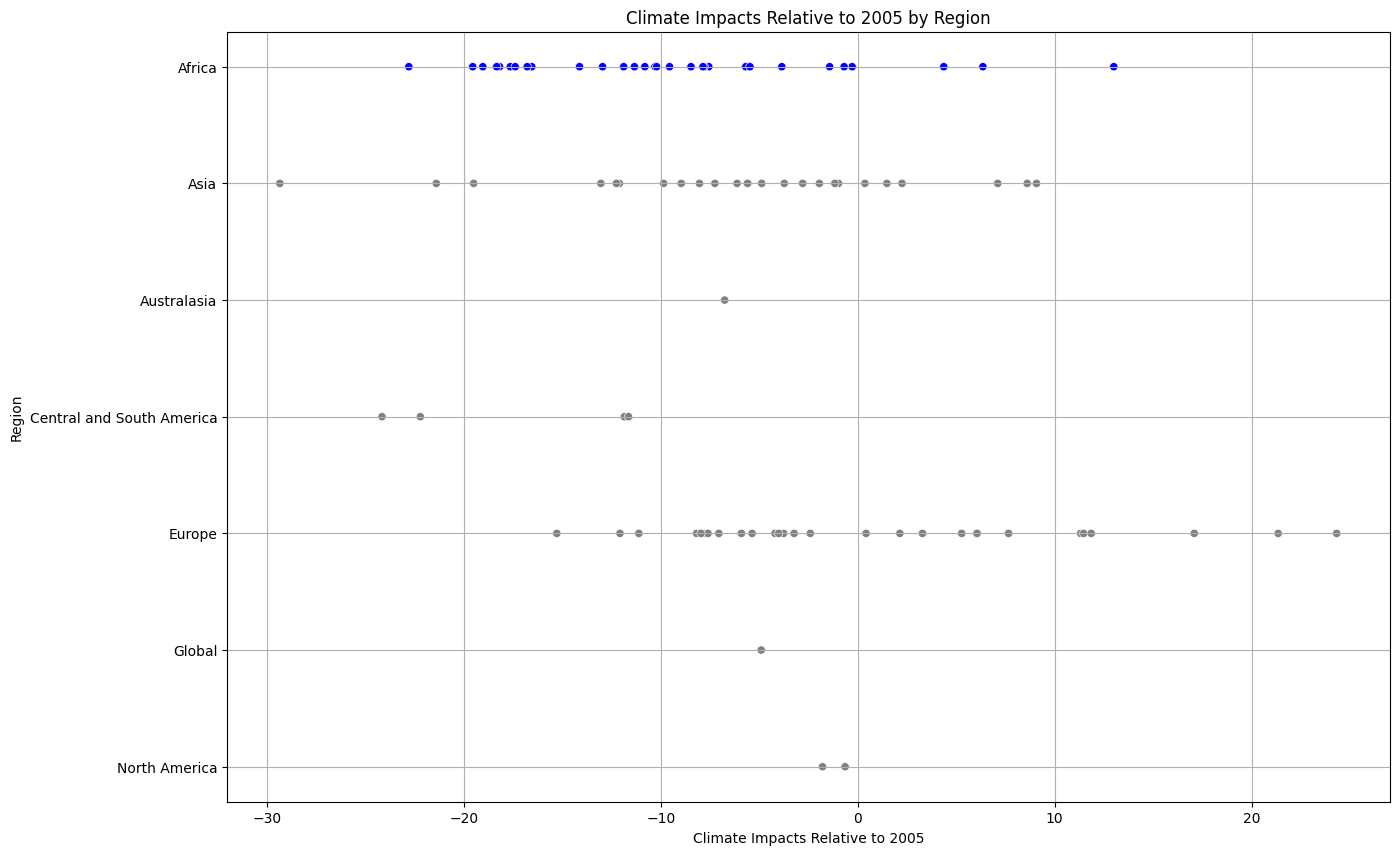

In [6]:
# Filter the dataset to include only the relevant columns with the new column of interest
climate_impact_data = df[['Country', 'Region', 'Climate impacts relative to 2005']]

# Drop rows with missing values in the relevant columns
climate_impact_data.dropna(subset=['Country', 'Region', 'Climate impacts relative to 2005'], inplace=True)

# Grouping by Region and Country
grouped_climate_impact_data = climate_impact_data.groupby(['Region', 'Country']).mean().reset_index()

# Creating a new color column for the climate impact data
grouped_climate_impact_data['SimpleColor'] = grouped_climate_impact_data['Region'].apply(lambda x: 'blue' if x == 'Africa' else 'gray')

# Creating the barcode plot for climate impacts
plt.figure(figsize=(15, 10))
sns.scatterplot(x='Climate impacts relative to 2005', y='Region', data=grouped_climate_impact_data, hue='SimpleColor', palette=['blue', 'gray'], legend=False)
plt.title('Climate Impacts Relative to 2005 by Region')
plt.xlabel('Climate Impacts Relative to 2005')
plt.ylabel('Region')
plt.grid(True)
plt.show()

In [7]:
df.to_csv("Projected_impacts_datasheet_11.16.2021.csv")

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8703 entries, 0 to 8702
Data columns (total 55 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                8703 non-null   int64  
 1   Ref No                                                            8703 non-null   object 
 2    Methods                                                          8703 non-null   object 
 3   Scale                                                             8703 non-null   object 
 4   Crop                                                              8703 non-null   object 
 5   Country                                                           8703 non-null   object 
 6   Site(location)                                                    2694 non-null   object 
 7   Region                           

In [9]:
df.describe()

,ID,latitude,longitude,Current Average Temperature (dC)_area_weighted,Current Average Temperature_point_coordinate (dC),Current Annual Precipitation (mm) _area_weighted,Current Annual Precipitation (mm) _point_coordinate,Future_Mid-point,Baseline_Mid-point,Local delta T,...,Climate impacts per decade (%),CO2 ppm,Publication year,Seasonal Precipitation change (mm) each study (local baseperiod),Base precipitation (annual) (mm) (local base period),Annual Preciptation change (%) (relative to local base),Base precipitation (seasonal) (mm) (local base period),Projected precipitation (mm),Estimated precipitation change from 2005 (mm),Estimated precipitation (mm)
count,8703.00000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8666.000000,8703.000000,8702.000000,4392.000000,...,8703.000000,8538.000000,8703.000000,386.000000,1917.000000,366.000000,189.000000,2.000000,8666.000000,3229.000000
mean,4352.00000,25.185816,32.340434,17.804514,17.252870,974.121895,962.207224,2055.435482,1986.571248,2.095515,...,-1.576233,514.895029,2014.038837,50.695555,862.841427,4.425903,668.146545,775.920000,29.189091,1000.694682
std,2512.48403,22.770279,69.821017,7.111171,8.282561,538.116430,693.195670,22.553559,13.148001,1.207587,...,5.253247,114.081462,5.256125,157.213514,577.562989,7.624984,397.076905,38.127198,68.199181,644.096054
min,1.00000,-38.416100,-122.000000,-8.371055,-8.371055,0.967242,0.967242,2000.000000,1965.000000,0.180000,...,-40.777778,330.000000,1984.000000,-335.800000,42.700000,-22.463600,154.000000,748.960000,-411.989780,1.184871
25%,2176.50000,14.058300,2.213750,11.848694,11.119357,605.289909,421.181280,2030.000000,1975.000000,1.127000,...,-2.678499,431.450000,2014.000000,-6.396000,467.000000,0.600000,381.000000,762.440000,-6.691920,502.568983
50%,4352.00000,32.403950,34.888800,17.663128,17.087790,907.985051,839.157841,2055.000000,1975.000000,1.807000,...,-0.701507,486.535320,2014.000000,4.195100,675.000000,4.790000,525.316500,775.920000,18.100457,853.602952
75%,6527.50000,40.339900,90.356300,24.380180,24.863827,1264.254206,1254.342238,2080.000000,2002.000000,2.800000,...,0.743806,550.500000,2017.000000,53.153200,1314.000000,7.000000,815.000000,789.400000,52.009594,1460.800072
max,8703.00000,61.924110,151.750000,30.500914,30.500914,3248.452253,3891.503190,2110.000000,2016.000000,6.600000,...,26.153333,935.874370,2020.000000,791.000000,3300.000000,25.333333,1803.000000,802.880000,824.181388,2905.217349


In [10]:
df["Crop"]

0       Maize
1       Maize
2       Maize
3       Maize
4       Maize
        ...  
8698    Wheat
8699    Wheat
8700    Wheat
8701    Wheat
8702    Wheat
Name: Crop, Length: 8703, dtype: object

# Zoom-in

In [1]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import IPython.display as ipd
import pyreadr


result = pyreadr.read_r("../data/results_ssp370_mpi_maize.rds")
ssp370 = result["results_ssp370_mpi_maize"]

result = pyreadr.read_r("../data/results_ssp585_mpi_maize.rds")
ssp585 = result["results_ssp585_mpi_maize"]

df = pd.concat([ssp370, ssp585])
geometry = [Point(xy) for xy in zip(df.lon, df.lat)]
df = gpd.GeoDataFrame(df, geometry=geometry).set_crs("EPSG:4326")

ipd.display(df.head())
df.info()

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70,geometry
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788,POINT (-16.37565 12.79198)
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209,POINT (-16.37565 12.79198)
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572,POINT (-16.37565 12.79198)
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285,POINT (-16.37565 12.79198)
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600,POINT (-16.37565 12.79198)


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   station_id            547453 non-null  object  
 1   crop                  547453 non-null  object  
 2   cycle                 547453 non-null  object  
 3   system                547453 non-null  object  
 4   cultivar              547453 non-null  object  
 5   ssp                   547453 non-null  object  
 6   gcm                   547453 non-null  object  
 7   horizon               541646 non-null  float64 
 8   planting_date         547453 non-null  object  
 9   lat                   547453 non-null  float64 
 10  lon                   547453 non-null  float64 
 11  elev                  547453 non-null  float64 
 12  flowering_date        547453 non-null  object  
 13  maturity_date         547453 non-null  object  
 14  planting_to_maturity  547453 non-

1. Average yield_rfd, yield_irr accross individual years for each combination of  crop, station_id, cycle, cultivar, ssp, gcm, horizon

In [2]:
result = pyreadr.read_r("../data/cultivar.rds")
cult_df = result["cultivar"]
cult_df.head()

,station_id,CTT_maize
rownames,,
1,1.0,1708.982394
2,1.0,1708.982394
3,2.0,1573.740415
4,2.0,1573.740415
5,2.0,1573.740415


In [3]:
cult_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2839 entries, 1 to 2839
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   station_id  2839 non-null   float64
 1   CTT_maize   2839 non-null   float64
dtypes: float64(2)
memory usage: 66.5+ KB


In [4]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 28 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   station_id            547453 non-null  object  
 1   crop                  547453 non-null  object  
 2   cycle                 547453 non-null  object  
 3   system                547453 non-null  object  
 4   cultivar              547453 non-null  object  
 5   ssp                   547453 non-null  object  
 6   gcm                   547453 non-null  object  
 7   horizon               541646 non-null  float64 
 8   planting_date         547453 non-null  object  
 9   lat                   547453 non-null  float64 
 10  lon                   547453 non-null  float64 
 11  elev                  547453 non-null  float64 
 12  flowering_date        547453 non-null  object  
 13  maturity_date         547453 non-null  object  
 14  planting_to_maturity  547453 non-

In [5]:
# Each station_id is associated to a point in the Africa map
# Aggregate station_id per administrative level 1 and 2

In [6]:
geojson_path = '../data/buffer_country_area.geojson'
gdf = gpd.read_file(geojson_path)

gdf.head()

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
0,1076.0,SDN,0.0,0.0,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
1,386.0,SDN,0.0,0.0,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
2,417.0,SDN,0.0,0.0,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
3,356.0,SDN,0.0,0.0,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
4,389.0,SDN,0.0,0.0,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."


In [7]:
df = gpd.sjoin(df, gdf[["maize_area", "sorghum_area", "millet_area", "wheat_area", "geometry"]], how="left", predicate='within')
df.drop(columns=["index_right"], inplace=True)
ipd.display(df.head())
ipd.display(df.info())
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70,geometry,maize_area,sorghum_area,millet_area,wheat_area
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,50.555383,70.777537,5.687481,9.479134,13.270788,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,50.793176,71.110446,5.714232,9.523720,13.333209,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,50.516464,70.723050,5.683102,9.471837,13.260572,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,50.911563,71.276189,5.727551,9.545918,13.364285,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,52.741334,73.837867,5.933400,9.889000,13.844600,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0


<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   station_id            547453 non-null  object  
 1   crop                  547453 non-null  object  
 2   cycle                 547453 non-null  object  
 3   system                547453 non-null  object  
 4   cultivar              547453 non-null  object  
 5   ssp                   547453 non-null  object  
 6   gcm                   547453 non-null  object  
 7   horizon               541646 non-null  float64 
 8   planting_date         547453 non-null  object  
 9   lat                   547453 non-null  float64 
 10  lon                   547453 non-null  float64 
 11  elev                  547453 non-null  float64 
 12  flowering_date        547453 non-null  object  
 13  maturity_date         547453 non-null  object  
 14  planting_to_maturity  547453 non-

None

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70,geometry,maize_area,sorghum_area,millet_area,wheat_area
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,50.555383,70.777537,5.687481,9.479134,13.270788,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,50.793176,71.110446,5.714232,9.523720,13.333209,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,50.516464,70.723050,5.683102,9.471837,13.260572,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,50.911563,71.276189,5.727551,9.545918,13.364285,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,52.741334,73.837867,5.933400,9.889000,13.844600,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,64.487270,90.282178,7.254818,12.091363,16.927908,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,66.452418,93.033385,7.475897,12.459828,17.443760,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,69.881527,97.834137,7.861672,13.102786,18.343901,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,63.943103,89.520345,7.193599,11.989332,16.785065,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0


In [8]:
gdf

,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
0,1076.0,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
1,386.0,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
2,417.0,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
3,356.0,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
4,389.0,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."
...,...,...,...,...,...,...,...
2024,528.0,RWA,0.000000,0.000000,0.0,0.7,"POLYGON ((29.82052 -2.40554, 29.82052 -2.15555..."
2025,1149.0,RWA,3854.300049,315.800003,0.0,2.0,"POLYGON ((28.98724 -2.40554, 28.90391 -2.40554..."
2026,25.0,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.08234 21.33236, -13.07424 21.332..."
2027,765.0,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.26019 21.33456, -13.20886 21.333..."


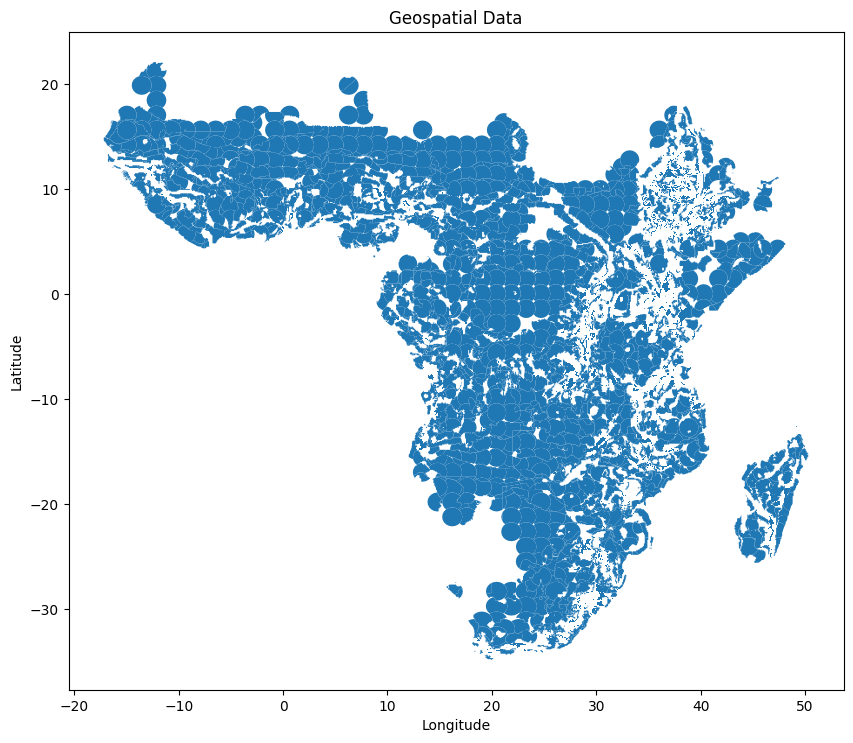

In [9]:
import matplotlib.pyplot as plt

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax)

# Optional: Customize the plot
ax.set_title("Geospatial Data")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

# Show plot
plt.show()

In [10]:
#a0 = gpd.read_file("../data/viz/atlas-region_admin0_harmonized.json")
#a1 = gpd.read_file("../data/viz/atlas-region_admin1_harmonizedV2@1.json")
#a1.crs = "EPSG:4326"
#a1 = a1.to_crs("EPSG:4326")

a2 = gpd.read_file("../data/viz/atlas-region_admin2_harmonizedV2.json")
a2.crs = "EPSG:4326"
a2 = a2.to_crs("EPSG:4326")

In [11]:
a2.head()

,id,admin2_name,admin1_name,admin0_name,admin_name,iso3,a2_a1_a0,geometry
0,None,'Maoa-Mafubelu,Leribe,Lesotho,'Maoa-Mafubelu,LSO,'Maoa-Mafubelu_Leribe_Lesotho,"POLYGON ((28.32543 -28.94269, 28.32476 -28.943..."
1,None,1er Arrondissement,Analamanga,Madagascar,1er Arrondissement,MDG,1er Arrondissement_Analamanga_Madagascar,"POLYGON ((47.49633 -18.90264, 47.49606 -18.901..."
2,None,2e Arrondissement,Analamanga,Madagascar,2e Arrondissement,MDG,2e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.53360 -18.91775, 47.53386 -18.917..."
3,None,3e Arrondissement,Analamanga,Madagascar,3e Arrondissement,MDG,3e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.53320 -18.91155, 47.53293 -18.908..."
4,None,4e Arrondissement,Analamanga,Madagascar,4e Arrondissement,MDG,4e Arrondissement_Analamanga_Madagascar,"POLYGON ((47.50261 -18.91013, 47.50247 -18.910..."


In [12]:
df = gpd.sjoin(df, a2[["admin0_name", "admin1_name", "admin2_name", "geometry"]], how="left", predicate='within')
df.drop(columns=["index_right"], inplace=True)

In [13]:
crops = df["crop"].unique()

grouped_by_station = df.groupby("station_id")


for c in crops:
    df[f"{c}_area_by_yield_rfd"] = df[f"{c}_area"] * df["yield_rfd"]
    df[f"{c}_area_by_yield_irr"] = df[f"{c}_area"] * df["yield_irr"]

df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,maize_area,sorghum_area,millet_area,wheat_area,admin0_name,admin1_name,admin2_name,maize_area_by_yield_rfd,maize_area_by_yield_irr
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8292.943696,8616.410247
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8331.950420,8873.055629
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8286.559491,8581.706105
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8351.370335,8639.391730
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8651.519999,9037.298653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,332181.470083,340636.210500
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,342304.176204,341260.283095
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,359967.916701,364628.187819
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,329378.404832,342515.123849


In [19]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]

df.groupby(cols_to_groupby + admins[:3]).count()

system  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name           
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona          20   
                                           2030.0  Senegal          Ziguinchor  Bignona          19   
                                           2050.0  Senegal          Ziguinchor  Bignona          20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona          20   
                                           2030.0  Senegal          Ziguinchor  Bignona          19   
...                                                                                             ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia          20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia          19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia          20   

                                                                                             planting_date  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name                  
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona                 20   
                                           2030.0  Senegal          Ziguinchor  Bignona                 19   
                                           2050.0  Senegal          Ziguinchor  Bignona                 20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona                 20   
                                           2030.0  Senegal          Ziguinchor  Bignona                 19   
...                                                                                                    ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia                 20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia                 19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia                 20   

                                                                                             lat  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name      admin1_name admin2_name        
1          maize 1     current  SSP370 MPI 2005.0  Senegal          Ziguinchor  Bignona       20   
                                           2030.0  Senegal          Ziguinchor  Bignona       19   
                                           2050.0  Senegal          Ziguinchor  Bignona       20   
                                SSP585 MPI 2005.0  Senegal          Ziguinchor  Bignona       20   
                                           2030.0  Senegal          Ziguinchor  Bignona       19   
...                                                                                          ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia       20   
                                SSP585 MPI 2005.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2030.0  Congo - Kinshasa Kasaï       Kamonia       19   
                                           2050.0  Congo - Kinshasa Kasaï       Kamonia       20   

                     

In [21]:
df.groupby(cols_to_groupby + admins[:3])["maize_area"].sum()

station_id  crop   cycle  cultivar  ssp     gcm  horizon  admin0_name       admin1_name  admin2_name
1           maize  1      current   SSP370  MPI  2005.0   Senegal           Ziguinchor   Bignona         24887.999907
                                                 2030.0   Senegal           Ziguinchor   Bignona         23643.599911
                                                 2050.0   Senegal           Ziguinchor   Bignona         24887.999907
                                    SSP585  MPI  2005.0   Senegal           Ziguinchor   Bignona         24887.999907
                                                 2030.0   Senegal           Ziguinchor   Bignona         23643.599911
                                                                                                            ...      
999         maize  1      late      SSP370  MPI  2030.0   Congo - Kinshasa  Kasaï        Kamonia        742461.100890
                                                 2050.0   Congo - Kinshas

In [22]:
df.groupby(cols_to_groupby + admins[:1])[["maize_area"]].sum()

maize_area
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                    
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
                                           2050.0  Senegal            24887.999907
                                SSP585 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
...                                                                            ...
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890
                                           2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937

[27594 rows x 1 columns]

In [23]:
gdf["station_id"] = gdf["station_id"].astype(int)
gdf.set_index("station_id", inplace=True)
gdf

,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
station_id,,,,,,
1076,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.65073 9.59373, 23.63028 9.55917, ..."
386,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
417,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((24.17452 8.69817, 24.18225 8.69379, ..."
356,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.65855 14.67497, 22.57854 14.64634..."
389,SDN,0.000000,0.000000,0.0,0.0,"POLYGON ((22.62200 13.67621, 22.58252 13.63780..."
...,...,...,...,...,...,...
528,RWA,0.000000,0.000000,0.0,0.7,"POLYGON ((29.82052 -2.40554, 29.82052 -2.15555..."
1149,RWA,3854.300049,315.800003,0.0,2.0,"POLYGON ((28.98724 -2.40554, 28.90391 -2.40554..."
25,None,0.000000,0.000000,0.0,0.0,"POLYGON ((-13.08234 21.33236, -13.07424 21.332..."


In [24]:
df[["lat", "lon", "station_id"]].drop_duplicates().sort_values(by="station_id")

,lat,lon,station_id
0,12.791975,-16.375654,1
180,11.375314,-13.542333,10
360,8.541992,2.040939,100
540,-4.916287,19.749201,1000
900,-3.499626,19.749201,1001
...,...,...,...
272855,-11.999592,19.749201,995
273029,-10.582931,19.749201,996
273203,-9.166270,19.749201,997
273377,-7.749609,19.749201,998


In [25]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]
df[cols_to_groupby + admins].drop_duplicates()

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name
0,1,maize,1,current,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona
20,1,maize,1,current,SSP370,MPI,2030.0,Senegal,Ziguinchor,Bignona
39,1,maize,1,current,SSP370,MPI,2050.0,Senegal,Ziguinchor,Bignona
59,1,maize,1,current,SSP370,MPI,NaN,Senegal,Ziguinchor,Bignona
60,1,maize,1,early,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona
...,...,...,...,...,...,...,...,...,...,...
273631,999,maize,1,early,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia
273650,999,maize,1,early,SSP585,MPI,2050.0,Congo - Kinshasa,Kasaï,Kamonia
273670,999,maize,1,late,SSP585,MPI,2005.0,Congo - Kinshasa,Kasaï,Kamonia
273689,999,maize,1,late,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia


In [26]:
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,maize_area,sorghum_area,millet_area,wheat_area,admin0_name,admin1_name,admin2_name,maize_area_by_yield_rfd,maize_area_by_yield_irr
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8292.943696,8616.410247
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8331.950420,8873.055629
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8286.559491,8581.706105
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8351.370335,8639.391730
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,POINT (-16.37565 12.79198),1244.399995,151.2,8572.799981,0.0,Senegal,Ziguinchor,Bignona,8651.519999,9037.298653
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,332181.470083,340636.210500
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,342304.176204,341260.283095
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,359967.916701,364628.187819
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,POINT (19.74920 -6.33295),39076.900047,0.2,0.100000,0.0,Congo - Kinshasa,Kasaï,Kamonia,329378.404832,342515.123849


In [35]:
from tqdm import tqdm

cols_to_groupby = ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name", "admin1_name", "admin2_name"]
rows = []

for group, subdf in tqdm(df.groupby(by=cols_to_groupby + admins)):
    crop = subdf["crop"].unique()[0]
    crop_area = subdf[f"{crop}_area"]
    if crop_area.shape[0] > 1:
        #print(group)
        pass
    crop_area = crop_area.sum() or 0#["yield_rfd"]
    if crop_area == 0:
        mean_yield_rfd = 0
        mean_yield_irr = 0
    else:
        mean_yield_rfd = (subdf[f"{crop}_area_by_yield_rfd"] / crop_area).sum()
        mean_yield_irr = (subdf[f"{crop}_area_by_yield_irr"] / crop_area).sum()
    rows.append([*group, crop_area, mean_yield_rfd, mean_yield_irr])


 82%|████████▏ | 22608/27602 [00:49<00:11, 453.70it/s]


In [58]:
subdf

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,geometry,maize_area,sorghum_area,millet_area,wheat_area,admin0_name,admin1_name,admin2_name,maize_area_by_yield_rfd,maize_area_by_yield_irr
180219,559,maize,2,double,late,SSP585,MPI,2050.0,2040-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,660069.661123,1.104274e+06
180220,559,maize,2,double,late,SSP585,MPI,2050.0,2041-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,700747.522133,1.057619e+06
180221,559,maize,2,double,late,SSP585,MPI,2050.0,2042-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,801250.260650,1.133531e+06
180222,559,maize,2,double,late,SSP585,MPI,2050.0,2043-03-29,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,349310.999073,1.106810e+06
180223,559,maize,2,double,late,SSP585,MPI,2050.0,2044-03-27,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,385883.963255,1.094901e+06
180224,559,maize,2,double,late,SSP585,MPI,2050.0,2045-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,493529.241944,1.104274e+06
180225,559,maize,2,double,late,SSP585,MPI,2050.0,2046-03-20,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,511093.922481,1.062976e+06
180226,559,maize,2,double,late,SSP585,MPI,2050.0,2047-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,729710.311038,1.131785e+06
180227,559,maize,2,double,late,SSP585,MPI,2050.0,2048-03-14,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,558387.314033,1.074622e+06
180228,559,maize,2,double,late,SSP585,MPI,2050.0,2049-03-23,1.458687,...,POINT (31.79082 1.45869),124876.999776,1156.699998,5556.499969,411.100006,Uganda,Western,Masindi,863562.518223,1.142976e+06


In [36]:
# Show me the yields for admin0_name = South Sudan admin1_name=="Jonglei"
df[
    (df["admin0_name"] == "South Sudan") & (df["admin1_name"] == "Jonglei")
][["yield_rfd", "yield_irr"]]

,yield_rfd,yield_irr
45134,4.979044,7.005376
45135,5.199821,6.292705
45136,4.224042,6.416282
45137,3.081521,6.847260
45138,5.116341,6.645515
...,...,...
186988,5.386464,6.282833
186989,5.170549,6.319851
186990,5.209867,6.099656
186991,5.049349,6.140389


In [48]:
#df.groupby(cols_to_groupby + admins[:3])[["maize_area"]].sum()

In [43]:
aggregated = pd.DataFrame(rows, columns=cols_to_groupby + admins + ["crop_area", "wmean_yield_rfd", "wmean_yield_irr"])
aggregated

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name,crop_area,wmean_yield_rfd,wmean_yield_irr
0,maize,1,current,SSP370,MPI,2005.0,Angola,Bengo,Dembos-Quibaxe,8.052029e+05,7.662596,9.654243
1,maize,1,current,SSP370,MPI,2005.0,Angola,Bengo,Nambuangongo,7.448000e+03,7.118768,8.925636
2,maize,1,current,SSP370,MPI,2005.0,Angola,Benguela,Baía Farta,0.000000e+00,0.000000,0.000000
3,maize,1,current,SSP370,MPI,2005.0,Angola,Benguela,Benguela,2.041968e+05,2.522948,8.383855
4,maize,1,current,SSP370,MPI,2005.0,Angola,Benguela,Chongoroi,2.464870e+06,7.868908,11.027931
...,...,...,...,...,...,...,...,...,...,...,...,...
22603,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kanungu,3.646800e+04,3.601343,9.287632
22604,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kibaale,2.215100e+05,5.764038,10.961670
22605,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kiruhura,5.917200e+04,4.418240,10.855468
22606,maize,2,late,SSP585,MPI,2050.0,Uganda,Western,Kitagwenda,4.365320e+05,4.263482,10.013184


In [57]:
for i in range(1, len(admins)):
    levels = admins[:i]
    grouped = aggregated.groupby(cols_to_groupby + levels)
    info = grouped[["wmean_yield_rfd"]].sum()
    info["wmean_yield_irr"] = grouped[["wmean_yield_irr"]].sum()
    none_levels = admins[i:]
    for l in none_levels:
        info[l] = None
    ipd.display(info)

wmean_yield_rfd  \
crop  cycle cultivar ssp    gcm horizon admin0_name                     
maize 1     current  SSP370 MPI 2005.0  Angola             645.159921   
                                        Benin               63.070270   
                                        Botswana            74.413071   
                                        Burkina Faso       123.608505   
                                        Burundi             23.735792   
...                                                               ...   
      2     late     SSP585 MPI 2050.0  Rwanda               3.170652   
                                        Somalia             34.803831   
                                        South Sudan         16.898690   
                                        Tanzania            60.670098   
                                        Uganda             114.523102   

                                                      wmean_yield_irr  \
crop  cycle cultivar ssp    gcm horizon admin0_name                     
maize 1     current  SSP370 MPI 2005.0  Angola             770.834364   
                                        Benin               66.154011   
                                        Botswana           137.083738   
                                        Burkina Faso       157.289479   
                                        Burundi             26.954274   
...                                                               ...   
      2     late     SSP585 MPI 2050.0  Rwanda              10.248222   
                                        Somalia             98.585885   
                                        South Sudan         23.073931   
                                        Tanzania           206.428228   
                                        Uganda             179.929576   

                                                     admin1_name admin2_name  
crop  cycle cultivar ssp    gcm horizon admin0_name                           
maize 1     current  SSP370 MPI 2005.0  Angola              None        None  
                                        Benin               None        None  
                                        Botswana            None        None  
                                        Burkina Faso        None        None  
                                        Burundi             None        None  
...                                                          ...         ...  
      2     late     SSP585 MPI 2050.0  Rwanda              None        None  
                                        Somalia             None        None  
                                        South Sudan         None        None  
                                        Tanzania            None        None  
                                        Uganda              None        None  

[1044 rows x 4 columns]

wmean_yield_rfd  \
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name                       
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo                 14.781363   
                                                    Benguela              30.665174   
                                                    Bié                   62.356818   
                                                    Cabinda                7.189597   
                                                    Cuando Cubango        63.076267   
...                                                                             ...   
      2     late     SSP585 MPI 2050.0  Tanzania    Tanga                  7.220189   
                                        Uganda      Central               19.648612   
                                                    Eastern               27.164152   
                                                    Northern              44.812775   
                                                    Western               22.897563   

                                                                    wmean_yield_irr  \
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name                       
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo                 18.579879   
                                                    Benguela              44.161628   
                                                    Bié                   64.839125   
                                                    Cabinda                7.830368   
                                                    Cuando Cubango        73.133422   
...                                                                             ...   
      2     late     SSP585 MPI 2050.0  Tanzania    Tanga                 10.343485   
                                        Uganda      Central               28.289295   
                                                    Eastern               36.383207   
                                                    Northern              65.370868   
                                                    Western               49.886206   

                                                                   admin2_name  
crop  cycle cultivar ssp    gcm horizon admin0_name admin1_name                 
maize 1     current  SSP370 MPI 2005.0  Angola      Bengo                 None  
                                                    Benguela              None  
                                                    Bié                   None  
                                                    Cabinda               None  
                                                    Cuando Cubango        None  
...                                                                        ...  
      2     late     SSP585 MPI 2050.0  Tanzania    Tanga                 None  
                                        Uganda      Central               None  
                                                    Eastern               None  
                                                    Northern              None  
                                                    Western               None  

[9108 rows x 3 columns]

In [53]:
aggregated.groupby(cols_to_groupby + admins[:1])[["wmean_yield_rfd"]].sum().reset_index()

,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,wmean_yield_rfd
0,maize,1,current,SSP370,MPI,2005.0,Angola,645.159921
1,maize,1,current,SSP370,MPI,2005.0,Benin,63.070270
2,maize,1,current,SSP370,MPI,2005.0,Botswana,74.413071
3,maize,1,current,SSP370,MPI,2005.0,Burkina Faso,123.608505
4,maize,1,current,SSP370,MPI,2005.0,Burundi,23.735792
...,...,...,...,...,...,...,...,...
1039,maize,2,late,SSP585,MPI,2050.0,Rwanda,3.170652
1040,maize,2,late,SSP585,MPI,2050.0,Somalia,34.803831
1041,maize,2,late,SSP585,MPI,2050.0,South Sudan,16.898690
1042,maize,2,late,SSP585,MPI,2050.0,Tanzania,60.670098


In [ ]:
# Filter aggregated dataframe by admin0_name = "South Sudan" and admin1_name = "Lakes"
aggregated[(aggregated["admin0_name"] == "South Sudan") & (aggregated["admin1_name"] == "Lakes")].groupby(
    ["crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
).sum()

In [85]:
aggregated.pivot_table(index=cols_to_groupby + ["admin0_name"], columns=["crop_area", "wmean_yield_rfd", "wmean_yield_irr"], aggfunc="sum")

: 

In [81]:
aggregated.to_csv("../data/aggregated_yields_v2.csv")

In [152]:
dfc = df.copy(deep=True)

cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]
admins = ["admin0_name"]
rows = []
i = 0


for group, subdf in dfc.groupby(by=cols_to_groupby + admins):
    crop = subdf["crop"].unique()[0]
    crop_area = subdf[f"{crop}_area"].unique().sum()#["yield_rfd"]
    mean_yield_rfd = (subdf["yield_rfd"] * crop_area).mean()
    mean_yield_irr = (subdf["yield_irr"] * crop_area).mean()
    rows.append([*group, None, None, crop_area, mean_yield_rfd, mean_yield_irr])
    ipd.display(subdf[['admin0_name', 'admin1_name', 'admin2_name']].drop_duplicates())
    i += 1
    if i >= 10:
        break

,admin0_name,admin1_name,admin2_name
0,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
20,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
39,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
0,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
20,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
39,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
60,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
80,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
99,Senegal,Ziguinchor,Bignona


,admin0_name,admin1_name,admin2_name
60,Senegal,Ziguinchor,Bignona


In [204]:
groupped = df.groupby(by=cols_to_groupby + ["admin0_name", "admin1_name", "admin2_name"])
aggregated = groupped[["maize_area"]].sum()

yield_rfd = groupped[["yield_rfd"]].mean()
wavg_by_area = yield_rfd["yield_rfd"] * aggregated["maize_area"]
aggregated["yield_rfd"] = yield_rfd
aggregated["wmean_yield_rfd"] = wavg_by_area

yield_irr = groupped[["yield_irr"]].mean()
wavg_by_area = yield_irr["yield_irr"] * aggregated["maize_area"]
aggregated["yield_irr"] = yield_irr
aggregated["wmean_yield_irr"] = wavg_by_area
aggregated = aggregated.reset_index()

aggregated

#yields * area

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,admin0_name,admin1_name,admin2_name,maize_area,yield_rfd,wmean_yield_rfd,yield_irr,wmean_yield_irr
0,1,maize,1,current,SSP370,MPI,2005.0,Senegal,Ziguinchor,Bignona,24887.999907,6.494200,1.616276e+05,7.011097,1.744922e+05
1,1,maize,1,current,SSP370,MPI,2030.0,Senegal,Ziguinchor,Bignona,23643.599911,6.136805,1.450962e+05,6.683022,1.580107e+05
2,1,maize,1,current,SSP370,MPI,2050.0,Senegal,Ziguinchor,Bignona,24887.999907,5.469402,1.361225e+05,6.390513,1.590471e+05
3,1,maize,1,current,SSP585,MPI,2005.0,Senegal,Ziguinchor,Bignona,24887.999907,6.494200,1.616276e+05,7.011097,1.744922e+05
4,1,maize,1,current,SSP585,MPI,2030.0,Senegal,Ziguinchor,Bignona,23643.599911,5.897731,1.394436e+05,6.642605,1.570551e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27607,999,maize,1,late,SSP370,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.558071,6.354035e+06,9.319341,6.919248e+06
27608,999,maize,1,late,SSP370,MPI,2050.0,Congo - Kinshasa,Kasaï,Kamonia,781538.000937,8.590412,6.713733e+06,8.936804,6.984452e+06
27609,999,maize,1,late,SSP585,MPI,2005.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.289461,6.154603e+06,9.685047,7.190770e+06
27610,999,maize,1,late,SSP585,MPI,2030.0,Congo - Kinshasa,Kasaï,Kamonia,742461.100890,8.385080,6.225596e+06,9.369668,6.956614e+06


In [243]:
a0s = df["admin0_name"].unique()


for admin0 in a0s:
    admin0_df = df[df["admin0_name"] == admin0]
    admin0_df["yield_irr"].sum()
    break

In [246]:
admin0_df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,P_Yw50,P_Yw70,geometry,maize_area,sorghum_area,millet_area,wheat_area,admin0_name,admin1_name,admin2_name
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,9.479134,13.270788,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,9.523720,13.333209,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,9.471837,13.260572,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,9.545918,13.364285,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,9.889000,13.844600,POINT (-16.37565 12.79198),1244.399995,151.200000,8572.799981,0.0,Senegal,Ziguinchor,Bignona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226704,763,maize,1,mono,late,SSP585,MPI,2050.0,2056-06-28,14.916967,...,5.178840,7.250377,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226705,763,maize,1,mono,late,SSP585,MPI,2050.0,2057-06-30,14.916967,...,3.213407,4.498770,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226706,763,maize,1,mono,late,SSP585,MPI,2050.0,2058-06-28,14.916967,...,4.704887,6.586841,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel
226707,763,maize,1,mono,late,SSP585,MPI,2050.0,2059-07-05,14.916967,...,3.836664,5.371330,POINT (-12.83400 14.91697),30.600000,118.300001,81.400001,0.0,Senegal,Matam,Kanel


In [250]:
admin0_df.drop(columns=["admin1_name", "admin2_name"]).groupby(by=cols_to_groupby)[["yield_irr"]].mean()

yield_irr
station_id crop  cycle cultivar ssp    gcm horizon           
1          maize 1     current  SSP370 MPI 2005.0    7.011097
                                           2030.0    6.683022
                                           2050.0    6.390513
                                SSP585 MPI 2005.0    7.011097
                                           2030.0    6.642605
...                                                       ...
763        maize 1     late     SSP370 MPI 2030.0    6.172665
                                           2050.0    5.624711
                                SSP585 MPI 2005.0    6.198293
                                           2030.0    5.735292
                                           2050.0    5.264819

[342 rows x 1 columns]

In [227]:
admin0_df.groupby(by=cols_to_groupby + ["admin2_name"]).count()

admin0_name  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name                
1          maize 1     current  SSP370 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
                                           2050.0  Bignona                1   
                                SSP585 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
...                                                                     ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   
                                SSP585 MPI 2005.0  Kanel                  1   
                                           2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   

                                                                admin1_name  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name                
1          maize 1     current  SSP370 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
                                           2050.0  Bignona                1   
                                SSP585 MPI 2005.0  Bignona                1   
                                           2030.0  Bignona                1   
...                                                                     ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   
                                SSP585 MPI 2005.0  Kanel                  1   
                                           2030.0  Kanel                  1   
                                           2050.0  Kanel                  1   

                                                                maize_area  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name               
1          maize 1     current  SSP370 MPI 2005.0  Bignona               1   
                                           2030.0  Bignona               1   
                                           2050.0  Bignona               1   
                                SSP585 MPI 2005.0  Bignona               1   
                                           2030.0  Bignona               1   
...                                                                    ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                 1   
                                           2050.0  Kanel                 1   
                                SSP585 MPI 2005.0  Kanel                 1   
                                           2030.0  Kanel                 1   
                                           2050.0  Kanel                 1   

                                                                yield_rfd  \
station_id crop  cycle cultivar ssp    gcm horizon admin2_name              
1          maize 1     current  SSP370 MPI 2005.0  Bignona              1   
                                           2030.0  Bignona              1   
                                           2050.0  Bignona              1   
                                SSP585 MPI 2005.0  Bignona              1   
                                           2030.0  Bignona              1   
...                                                                   ...   
763        maize 1     late     SSP370 MPI 2030.0  Kanel                1   
                                           2050.0  Kanel                1   
                                SSP585 MPI 2005.0  Kanel                1   
                                           2030.0  Kanel                1   
                                           2050.0  Kanel             

In [219]:
admin0_df.drop(columns=["admin1_name", "admin2_name"]).sum()

station_id         1111111111111111111111111111111111111111111111...
crop               maizemaizemaizemaizemaizemaizemaizemaizemaizem...
cycle              1111111111111111111111111111111111111111111111...
cultivar           currentcurrentcurrentcurrentcurrentcurrentearl...
ssp                SSP370SSP370SSP370SSP585SSP585SSP585SSP370SSP3...
gcm                MPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIMPIM...
horizon                                                     693690.0
admin0_name        SenegalSenegalSenegalSenegalSenegalSenegalSene...
maize_area                                           51071792.442607
yield_rfd                                                1349.063209
wmean_yield_rfd                                     231884568.118044
yield_irr                                                2066.052763
wmean_yield_irr                                       325771308.3579
dtype: object

In [199]:
df.groupby(cols_to_groupby).agg({
    'yield_rfd': 'sum',
    'yield_irr': 'sum',
    'maize_area': 'sum',
}).reset_index()

,station_id,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,yield_irr,maize_area
0,1,maize,1,current,SSP370,MPI,2005.0,129.883990,140.221948,24887.999907
1,1,maize,1,current,SSP370,MPI,2030.0,116.599299,126.977412,23643.599911
2,1,maize,1,current,SSP370,MPI,2050.0,109.388030,127.810265,24887.999907
3,1,maize,1,current,SSP585,MPI,2005.0,129.883990,140.221948,24887.999907
4,1,maize,1,current,SSP585,MPI,2030.0,112.056883,126.209504,23643.599911
...,...,...,...,...,...,...,...,...,...,...
27715,999,maize,1,late,SSP370,MPI,2030.0,162.603354,177.067484,742461.100890
27716,999,maize,1,late,SSP370,MPI,2050.0,171.808240,178.736089,781538.000937
27717,999,maize,1,late,SSP585,MPI,2005.0,157.499764,184.015886,742461.100890
27718,999,maize,1,late,SSP585,MPI,2030.0,159.316515,178.023694,742461.100890


In [198]:
cols_to_sum = ['yield_rfd', 'yield_irr', 'maize_area']
df.groupby('admin0_name')[cols_to_sum].sum().reset_index()

,admin0_name,yield_rfd,yield_irr,maize_area
0,Angola,285523.185010,339521.693869,6.968156e+08
1,Benin,24141.819554,26995.059042,2.749079e+08
2,Botswana,45645.284831,89436.950386,1.355446e+07
3,Burkina Faso,40434.505839,53476.274378,2.771001e+08
4,Burundi,7598.934584,8749.788899,2.821312e+07
5,Cameroon,68296.426628,71939.572954,2.414078e+08
6,Central African Republic,126401.797249,133165.098431,3.218504e+07
7,Chad,60312.240281,93555.028845,7.980516e+07
8,Congo - Brazzaville,125840.655147,145835.234220,6.096351e+06
9,Congo - Kinshasa,672658.069839,749503.064128,8.781464e+08


In [193]:
#aggregated.groupby(by=cols_to_groupby + ["admin0_name"]).sum()
pd.pivot_table(aggregated, index=cols_to_groupby + ["admin0_name"], values=["yield_rfd", "yield_irr", "maize_area"], aggfunc="sum")

maize_area  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                       
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907   
                                           2030.0  Senegal            23643.599911   
                                           2050.0  Senegal            24887.999907   
                                SSP585 MPI 2005.0  Senegal            24887.999907   
                                           2030.0  Senegal            23643.599911   
...                                                                            ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890   
                                           2050.0  Congo - Kinshasa  781538.000937   
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890   
                                           2030.0  Congo - Kinshasa  742461.100890   
                                           2050.0  Congo - Kinshasa  781538.000937   

                                                                     yield_irr  \
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                   
1          maize 1     current  SSP370 MPI 2005.0  Senegal            7.011097   
                                           2030.0  Senegal            6.683022   
                                           2050.0  Senegal            6.390513   
                                SSP585 MPI 2005.0  Senegal            7.011097   
                                           2030.0  Senegal            6.642605   
...                                                                        ...   
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa   9.319341   
                                           2050.0  Congo - Kinshasa   8.936804   
                                SSP585 MPI 2005.0  Congo - Kinshasa   9.685047   
                                           2030.0  Congo - Kinshasa   9.369668   
                                           2050.0  Congo - Kinshasa   8.881497   

                                                                     yield_rfd  
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                  
1          maize 1     current  SSP370 MPI 2005.0  Senegal            6.494200  
                                           2030.0  Senegal            6.136805  
                                           2050.0  Senegal            5.469402  
                                SSP585 MPI 2005.0  Senegal            6.494200  
                                           2030.0  Senegal            5.897731  
...                                                                        ...  
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa   8.558071  
                                           2050.0  Congo - Kinshasa   8.590412  
                                SSP585 MPI 2005.0  Congo - Kinshasa   8.289461  
                                           2030.0  Congo - Kinshasa   8.385080  
                                           2050.0  Congo - Kinshasa   8.714918  

[27594 rows x 3 columns]

In [158]:
df.groupby(by=cols_to_groupby + ["admin0_name"])[["maize_area"]].sum()

maize_area
station_id crop  cycle cultivar ssp    gcm horizon admin0_name                    
1          maize 1     current  SSP370 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
                                           2050.0  Senegal            24887.999907
                                SSP585 MPI 2005.0  Senegal            24887.999907
                                           2030.0  Senegal            23643.599911
...                                                                            ...
999        maize 1     late     SSP370 MPI 2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937
                                SSP585 MPI 2005.0  Congo - Kinshasa  742461.100890
                                           2030.0  Congo - Kinshasa  742461.100890
                                           2050.0  Congo - Kinshasa  781538.000937

[27594 rows x 1 columns]

In [116]:
ex = pd.read_parquet("../data/viz/population_long.parquet")
ex

,admin2_name,admin1_name,admin0_name,total_pop,rural_pop
0,'Maoa-Mafubelu,Leribe,Lesotho,1.965922e+04,1.965922e+04
1,1er Arrondissement,Analamanga,Madagascar,1.214077e+05,2.080491e+03
2,2e Arrondissement,Analamanga,Madagascar,9.486745e+04,7.921931e+03
3,3e Arrondissement,Analamanga,Madagascar,1.051414e+05,2.385852e+02
4,4e Arrondissement,Analamanga,Madagascar,7.508979e+04,8.373393e+03
...,...,...,...,...,...
5246,None,Zambezia,Mozambique,5.818622e+06,5.492878e+06
5247,None,Zamfara,Nigeria,4.918473e+06,4.601762e+06
5248,None,Ziguinchor,Senegal,6.459781e+05,5.918606e+05
5249,None,Zinder/Diffa,Niger,5.946339e+06,5.785236e+06


In [120]:
ex[ex["admin2_name"].isna()]

,admin2_name,admin1_name,admin0_name,total_pop,rural_pop
4596,None,None,Angola,3.361367e+07,2.051530e+07
4597,None,None,Benin,1.191524e+07,1.017626e+07
4598,None,None,Botswana,2.389953e+06,2.196215e+06
4599,None,None,Burkina Faso,2.281666e+07,1.945101e+07
4600,None,None,Burundi,1.107160e+07,9.868713e+06
...,...,...,...,...,...
5246,None,Zambezia,Mozambique,5.818622e+06,5.492878e+06
5247,None,Zamfara,Nigeria,4.918473e+06,4.601762e+06
5248,None,Ziguinchor,Senegal,6.459781e+05,5.918606e+05
5249,None,Zinder/Diffa,Niger,5.946339e+06,5.785236e+06


In [ ]:
from collections import defaultdict

a0_to_station_ids = defaultdict(set)
a1_to_station_ids = defaultdict(set)
a2_to_station_ids = defaultdict(set)

for i, row in gdf.iterrows():
    a0_to_station_ids[row["admin0_name"]].add(i)
    a1_to_station_ids[row["admin1_name"]].add(i)
    a2_to_station_ids[row["admin2_name"]].add(i)


In [31]:
cols_to_groupby = ["station_id", "crop", "cycle", "cultivar", "ssp", "gcm", "horizon"]

yield_rfd_by_group = df[cols_to_groupby + ["yield_rfd"]].groupby(by=cols_to_groupby).mean().reset_index()#.set_index("station_id")
yield_irr_by_group = df[cols_to_groupby + ["yield_irr"]].groupby(by=cols_to_groupby).mean().reset_index()#.set_index("station_id")

yield_rfd_by_group["station_id"] = yield_rfd_by_group["station_id"].astype(int)
yield_irr_by_group["station_id"] = yield_irr_by_group["station_id"].astype(int)

yield_rfd_by_group.set_index("station_id", inplace=True)
yield_irr_by_group.set_index("station_id", inplace=True)

In [51]:
#df.join(gdf.reset_index(), how="inner", on="station_id")
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,4.610584,60.969782,101.616304,143.964548,38.692362,64.487270,90.282178,7.254818,12.091363,16.927908
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,7.924681,62.827740,104.712901,148.351640,39.871451,66.452418,93.033385,7.475897,12.459828,17.443760
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,11.921751,66.069807,110.116345,156.006951,41.928916,69.881527,97.834137,7.861672,13.102786,18.343901
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,3.806639,60.455298,100.758830,142.749724,38.365862,63.943103,89.520345,7.193599,11.989332,16.785065


In [40]:
df

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273723,999,maize,1,mono,late,SSP585,MPI,2050.0,2055-10-26,-6.332948,...,4.610584,60.969782,101.616304,143.964548,38.692362,64.487270,90.282178,7.254818,12.091363,16.927908
273724,999,maize,1,mono,late,SSP585,MPI,2050.0,2056-10-26,-6.332948,...,7.924681,62.827740,104.712901,148.351640,39.871451,66.452418,93.033385,7.475897,12.459828,17.443760
273725,999,maize,1,mono,late,SSP585,MPI,2050.0,2057-10-26,-6.332948,...,11.921751,66.069807,110.116345,156.006951,41.928916,69.881527,97.834137,7.861672,13.102786,18.343901
273726,999,maize,1,mono,late,SSP585,MPI,2050.0,2058-10-26,-6.332948,...,3.806639,60.455298,100.758830,142.749724,38.365862,63.943103,89.520345,7.193599,11.989332,16.785065


   station_id   crop cycle system cultivar     ssp  gcm  horizon  \
0           1  maize     1   mono  current  SSP370  MPI   2005.0   
1           1  maize     1   mono  current  SSP370  MPI   2005.0   
2           1  maize     1   mono  current  SSP370  MPI   2005.0   
3           1  maize     1   mono  current  SSP370  MPI   2005.0   
4           1  maize     1   mono  current  SSP370  MPI   2005.0   
5           1  maize     1   mono  current  SSP370  MPI   2005.0   
6           1  maize     1   mono  current  SSP370  MPI   2005.0   
7           1  maize     1   mono  current  SSP370  MPI   2005.0   
8           1  maize     1   mono  current  SSP370  MPI   2005.0   
9           1  maize     1   mono  current  SSP370  MPI   2005.0   
10          1  maize     1   mono  current  SSP370  MPI   2005.0   
11          1  maize     1   mono  current  SSP370  MPI   2005.0   
12          1  maize     1   mono  current  SSP370  MPI   2005.0   
13          1  maize     1   mono  current  SSP3

In [48]:
subdf

,station_id,crop,cycle,system,cultivar,ssp,gcm,horizon,planting_date,lat,...,irr_water,N_Yw30,N_Yw50,N_Yw70,K_Yw30,K_Yw50,K_Yw70,P_Yw30,P_Yw50,P_Yw70
0,1,maize,1,mono,current,SSP370,MPI,2005.0,1995-06-25,12.791975,...,20.931242,47.797817,79.663028,112.862320,30.333230,50.555383,70.777537,5.687481,9.479134,13.270788
1,1,maize,1,mono,current,SSP370,MPI,2005.0,1996-06-17,12.791975,...,21.499719,48.022639,80.037732,113.393180,30.475906,50.793176,71.110446,5.714232,9.523720,13.333209
2,1,maize,1,mono,current,SSP370,MPI,2005.0,1997-06-11,12.791975,...,26.868303,47.761021,79.601701,112.775435,30.309878,50.516464,70.723050,5.683102,9.471837,13.260572
3,1,maize,1,mono,current,SSP370,MPI,2005.0,1998-06-24,12.791975,...,25.126365,48.134569,80.224282,113.657474,30.546938,50.911563,71.276189,5.727551,9.545918,13.364285
4,1,maize,1,mono,current,SSP370,MPI,2005.0,1999-06-08,12.791975,...,15.877426,49.864534,83.107556,117.742343,31.644800,52.741334,73.837867,5.933400,9.889000,13.844600
5,1,maize,1,mono,current,SSP370,MPI,2005.0,2000-06-16,12.791975,...,16.545827,50.268655,83.781092,118.696573,31.901262,53.168770,74.436278,5.981487,9.969144,13.956802
6,1,maize,1,mono,current,SSP370,MPI,2005.0,2001-06-10,12.791975,...,19.837070,48.564721,80.941201,114.673167,30.819919,51.366532,71.913144,5.778735,9.631225,13.483715
7,1,maize,1,mono,current,SSP370,MPI,2005.0,2002-06-15,12.791975,...,26.496779,51.482894,85.804823,121.563686,32.671836,54.453060,76.234285,6.125969,10.209949,14.293928
8,1,maize,1,mono,current,SSP370,MPI,2005.0,2003-06-10,12.791975,...,28.910990,50.239342,83.732236,118.627357,31.882659,53.137765,74.392872,5.977999,9.963331,13.948663
9,1,maize,1,mono,current,SSP370,MPI,2005.0,2004-06-06,12.791975,...,47.421102,41.714654,69.524423,98.498486,26.472761,44.121269,61.769776,4.963643,8.272738,11.581833


In [32]:
df["planting_date"].max()#["horizon"].min()

datetime.date(2060, 11, 5)

In [33]:
yield_rfd_by_group = yield_rfd_by_group.join(gdf.reset_index(), how="inner", on="station_id")
yield_rfd_by_group

,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,index,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry
station_id,,,,,,,,,,,,,,,
1,maize,1,current,SSP370,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP370,MPI,2030.0,6.136805,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP370,MPI,2050.0,5.469402,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP585,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
1,maize,1,current,SSP585,MPI,2030.0,5.897731,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,maize,1,late,SSP370,MPI,2030.0,8.558071,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."
999,maize,1,late,SSP370,MPI,2050.0,8.590412,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."
999,maize,1,late,SSP585,MPI,2005.0,8.289461,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1..."


In [35]:
yield_irr_by_group.columns0

Index(['crop', 'cycle', 'cultivar', 'ssp', 'gcm', 'horizon', 'yield_irr'], dtype='object')

In [37]:
yield_rfd_by_group["w_average"] = yield_rfd_by_group["yield_rfd"] * yield_rfd_by_group["maize_area"]
yield_rfd_by_group

,crop,cycle,cultivar,ssp,gcm,horizon,yield_rfd,index,station_id,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry,w_average
station_id,,,,,,,,,,,,,,,,
1,maize,1,current,SSP370,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP370,MPI,2030.0,6.136805,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP370,MPI,2050.0,5.469402,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP585,MPI,2005.0,6.494200,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
1,maize,1,current,SSP585,MPI,2030.0,5.897731,1,386.0,SDN,0.000000,0.000000,0.000000,0.0,"POLYGON ((23.48757 9.17386, 23.48166 9.17317, ...",0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,maize,1,late,SSP370,MPI,2030.0,8.558071,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.483716e+06
999,maize,1,late,SSP370,MPI,2050.0,8.590412,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.489323e+06
999,maize,1,late,SSP585,MPI,2005.0,8.289461,999,653.0,KEN,173370.400131,16103.499982,11654.999976,22.0,"MULTIPOLYGON (((36.98675 -1.07228, 36.98675 -1...",1.437147e+06


In [38]:
yield_rfd_by_group.to_csv("aggregated_yield_rfd.csv", index=False)

In [ ]:
gdf[gdf.index == 999]

,ISO3,maize_area,sorghum_area,millet_area,wheat_area,geometry,index_right,admin0_name,admin1_name,admin2_name,iso3
station_id,,,,,,,,,,,
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",1036,Angola,Lunda Norte,Cuilo,AGO
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1036,Angola,Lunda Norte,Cuilo,AGO
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",985,Angola,Lunda Norte,Chitato (Lóvua),AGO
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",985,Angola,Lunda Norte,Chitato (Lóvua),AGO
999,AGO,22.600000,0.0,0.0,0.0,"MULTIPOLYGON (((19.55892 -6.99999, 19.54818 -6...",1937,Congo - Kinshasa,Kwango,Kahemba,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1937,Congo - Kinshasa,Kwango,Kahemba,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1982,Congo - Kinshasa,Kasaï,Kamonia,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1351,Congo - Kinshasa,Kwango,Feshi,COD
999,COD,39076.900047,0.2,0.1,0.0,"MULTIPOLYGON (((18.92287 -5.98865, 18.98785 -5...",1573,Congo - Kinshasa,Kwilu,Gungu,COD


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 547453 entries, 0 to 273727
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   station_id            547453 non-null  object 
 1   crop                  547453 non-null  object 
 2   cycle                 547453 non-null  object 
 3   system                547453 non-null  object 
 4   cultivar              547453 non-null  object 
 5   ssp                   547453 non-null  object 
 6   gcm                   547453 non-null  object 
 7   horizon               541646 non-null  float64
 8   planting_date         547453 non-null  object 
 9   lat                   547453 non-null  float64
 10  lon                   547453 non-null  float64
 11  elev                  547453 non-null  float64
 12  flowering_date        547453 non-null  object 
 13  maturity_date         547453 non-null  object 
 14  planting_to_maturity  547453 non-null  float64
 15  yield

In [28]:
df["horizon"].unique()

array([2005., 2030., 2050.,   nan])

In [29]:
df["ssp"].unique()

array(['SSP370', 'SSP585'], dtype=object)